In [172]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.models
from PIL import Image
from scipy import ndimage
import random

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [65]:
datasetPath = '/content/gdrive/MyDrive/APS360/ProgressReport/APS360SampleData'

In [163]:
def loadData():
  np.random.seed(1000) 
  #Ensuring data is a 224x224 image, used the centercrop function to crop at center
  transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])

  
  numWorkers = 1
  batchSize = 1

  classes = ['COVID-19', 'Normal', 'Pneumonial-Bacterial', 'Pneumonial-Viral']
    
  sampleSet = torchvision.datasets.ImageFolder(datasetPath, transform=transform)
  sampleLoader = torch.utils.data.DataLoader(sampleSet, batch_size=batchSize, 
                                            num_workers= numWorkers,
                                            shuffle=True)
  return sampleLoader

 

In [116]:
sampleLoader = loadData()
print(len(sampleLoader))

40


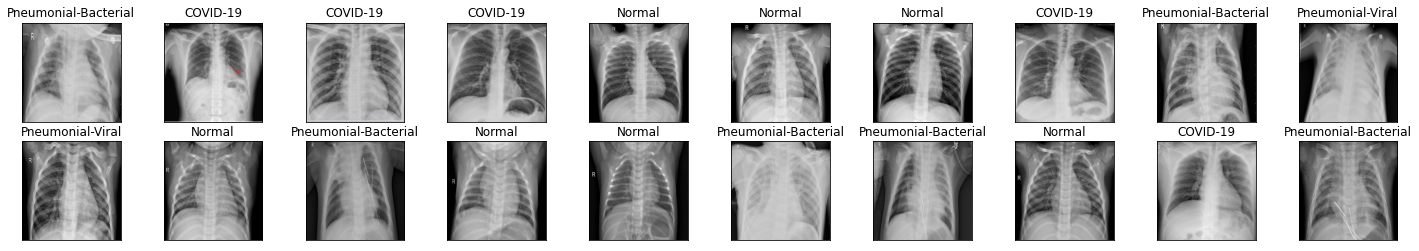

In [165]:
k = 0
dataiter = iter(sampleLoader)
images, labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for images, labels in sampleLoader:
    
    ax = fig.add_subplot(2, 20/2, k+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[0], (1, 2, 0)))
    ax.set_title(classes[labels[0]])
    k += 1
    if k > 19:
        break
        

In [173]:
#Rotates an image by a random angle
def rotateImg(image):
  np.random.seed(1000) 
  angle = random.randint(-10,10)
  return torch.from_numpy(ndimage.rotate(image, angle, reshape=False))


In [209]:
dataiter = iter(sampleLoader)
images, labels = dataiter.next()
image = np.transpose(images[0], (1, 2, 0))
label = classes[labels[0]]

Text(0.5, 1.0, 'Pneumonial-Bacterial Rotated')

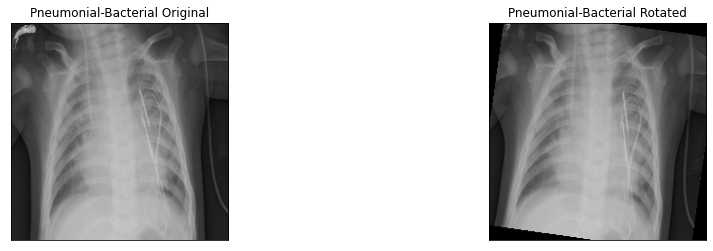

In [210]:
fig = plt.figure(figsize=(50, 4))
ax = fig.add_subplot(1, 6, 1, xticks=[], yticks=[])
plt.imshow(image)
ax.set_title(label+' Original')

ax = fig.add_subplot(1, 6, 2, xticks=[], yticks=[])
image = rotateImg(image)
plt.imshow(image)
ax.set_title(label+' Rotated')